# Cats and Dogs Classifier using Modified AlexNet




In this notebook, we will try to explore one of the architecture in convolutional neural network, AlexNet, and apply a modified version of the architecture to build a classifier.

Reasons it is a modified version:
- Here we are building a binary classifier, which is to classify two categories, but in AlexNet, it can classify 1000 categories, hence the final layer is a dense layer of 1000 tensors.
- We cannot match the number of filters learnt in each convolutional layer as it requires a huge amount of GPU resources to train the model.

Number of filters in the original AlexNet:

Convolutional Layer 1 - 96

Convolutional Layer 2 - 256

Convolutional Layer 3 - 384

Convolutional Layer 4 - 384

Convolutional Layer 5 - 256


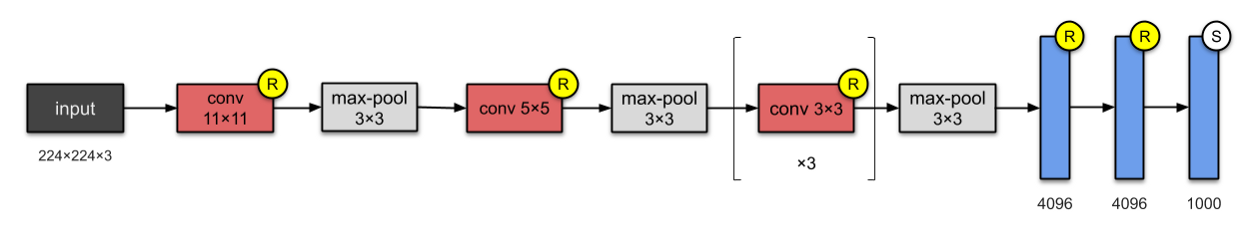

Check out the introduction to the architectures [here](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d) and the article explaining the number of filters [here](https://towardsdatascience.com/understanding-alexnet-a-detailed-walkthrough-20cd68a490aa).

**AlexNet**

AlexNet was introduced in 2012, and as such, we are actually using an "old" architecture to build our classifier model. But as we will see later, this architecture still gives relevant and accurate results compared to our last base model. 

In AlexNet, it uses 5 convolutional layers as seen in the figure above, with 3 fully-connected layers. In fact, it only adds a few more layers compared to LeNet-5, one of the simplest architectures that uses 2 convolutional layers and 3 fully connected layers. 

Fun fact:
- AlexNet is one of the earliest architecture to use Rectified Linear Units as activation functions

In [2]:
# This is so that I can utilize the storage space in my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



# Checking base dataset

As seen in the figure above, AlexNet takes in images of shape (224, 224, 3), we will be resizing our images from our original dataset to fit that purpose. We are going to save these resized images to a new folder named *cats_and_dogs_alexnet* for better clarity.

In [2]:
import os

base_dir = '/content/drive/My Drive/Image Datasets/cats_and_dogs_small/'

train_cats_dir = os.path.join(base_dir, 'train/cats')
val_cats_dir = os.path.join(base_dir, 'validation/cats')
test_cats_dir = os.path.join(base_dir, 'test/cats')

train_dogs_dir = os.path.join(base_dir, 'train/dogs')
val_dogs_dir = os.path.join(base_dir, 'validation/dogs')
test_dogs_dir = os.path.join(base_dir, 'test/dogs')

In [ ]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total validation cat images: ', len(os.listdir(val_cats_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))

print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images: ', len(os.listdir(val_dogs_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))



---



Renaming the files with .jpg extension to .jpeg extension to utilize decode_jpeg()

- This is not necessary at all, I ran into an issue where the format of the images are not compatible when resizing them. Initially, I thought changing the extension of the image files would work, but it turned out that the format has to be changed. 

- The solution was to detect if the format is different, and removed the image when found. The following steps CAN be used as an alternative. To replace the removed images, I went and searched online for different cat/dog images. However, while I couldn't compare and tell if the new image has already existed in the current dataset, this was a quick and easy solution. Nonetheless, the number of duplicates, if any, would not be relevant to cause a huge difference to the accuracy of the model. Don't quote me on that.

In [ ]:
import os

# Rename for train_cats_dir
train_cats_dir_temp = np.array(os.listdir(train_cats_dir))
train_cats_dir = train_cats_dir + '/'

for filename in train_cats_dir_temp:
  dst =filename.split('.')[0] + ".jpeg"
  src =train_cats_dir + filename
  dst =train_cats_dir + dst
  os.rename(src, dst)
  print(dst)

In [ ]:
# Rename for val_cats_dir
val_cats_dir_temp = np.array(os.listdir(val_cats_dir))
val_cats_dir = val_cats_dir + '/'

for filename in val_cats_dir_temp:
  dst =filename.split('.')[0] + ".jpeg"
  src =val_cats_dir + filename
  dst =val_cats_dir + dst
  os.rename(src, dst)
  print(dst)

In [ ]:
# Rename for test_cats_dir
test_cats_dir_temp = np.array(os.listdir(test_cats_dir))
test_cats_dir = test_cats_dir + '/'

for filename in test_cats_dir_temp:
  dst =filename.split('.')[0] + ".jpeg"
  src =test_cats_dir + filename
  dst =test_cats_dir + dst
  os.rename(src, dst)
  print(dst)

In [ ]:
# Rename for train_dogs_dir
train_dogs_dir_temp = np.array(os.listdir(train_dogs_dir))
train_dogs_dir = train_dogs_dir + '/'

for filename in train_dogs_dir_temp:
  dst =filename.split('.')[0] + ".jpeg"
  src =train_dogs_dir + filename
  dst =train_dogs_dir + dst
  os.rename(src, dst)
  print(dst)

In [ ]:
# Rename for val_dogs_dir
val_dogs_dir_temp = np.array(os.listdir(val_dogs_dir))
val_dogs_dir = val_dogs_dir + '/'

for filename in val_dogs_dir_temp:
  dst =filename.split('.')[0] + ".jpeg"
  src =val_dogs_dir + filename
  dst =val_dogs_dir + dst
  os.rename(src, dst)
  print(dst)

In [ ]:
# Rename for test_dogs_dir
test_dogs_dir_temp = np.array(os.listdir(test_dogs_dir))
test_dogs_dir = test_dogs_dir + '/'

for filename in test_dogs_dir_temp:
  dst =filename.split('.')[0] + ".jpeg"
  src =test_dogs_dir + filename
  dst =test_dogs_dir + dst
  os.rename(src, dst)
  print(dst)



---



# Format issue

Below is the solution I've used in case anyone faces the issue below.

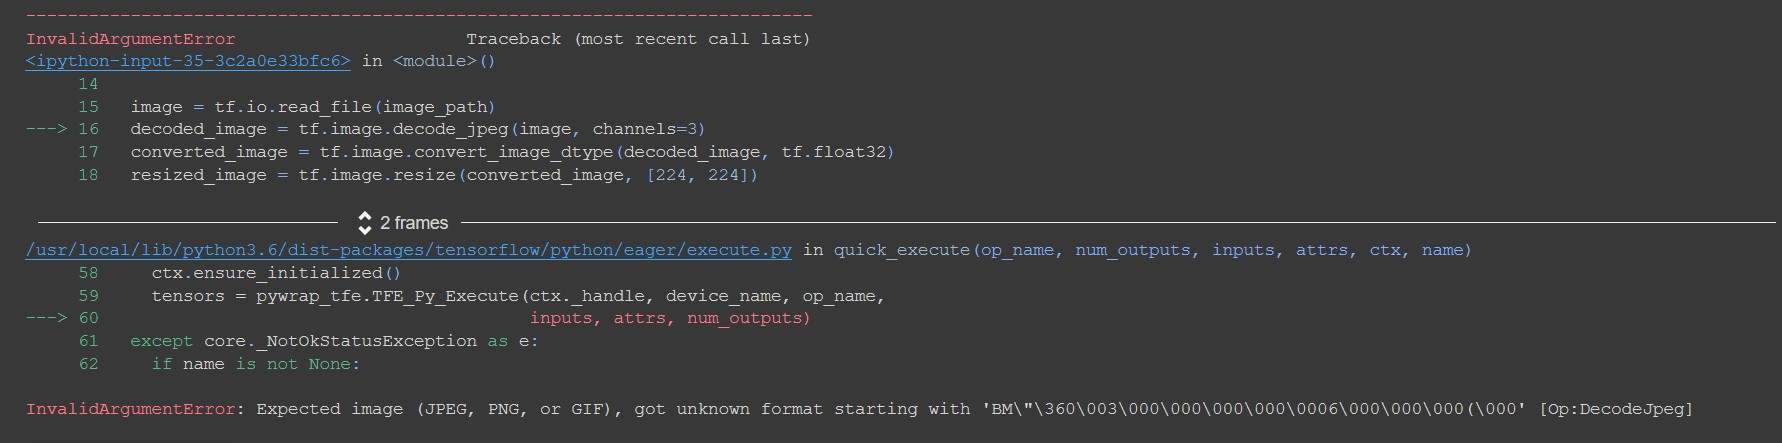

In [ ]:
# Removing image file with invalid format for decode_jpeg

print("[Original] Number of data samples in " + train_cats_dir + " : " + str(len(os.listdir(train_cats_dir))))

for i, filename in enumerate(os.listdir(train_cats_dir)):
  filename  = train_cats_dir + filename
  with open(filename, 'rb') as imageFile:
    if imageFile.read().startswith(b'BM'):
      print(filename)
      os.remove(filename)

print("[After cleaning] Number of data samples in " + train_cats_dir + " : " + str(len(os.listdir(train_cats_dir))))


[Original] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/cats/ : 1000
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/cats/391.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/cats/445.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/cats/910.jpeg
[After cleaning] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/cats/ : 997


In [ ]:
print("[Original] Number of data samples in " + val_cats_dir + " : " + str(len(os.listdir(val_cats_dir))))

for i, filename in enumerate(os.listdir(val_cats_dir)):
  filename  = val_cats_dir + filename
  with open(filename, 'rb') as imageFile:
    if imageFile.read().startswith(b'BM'):
      print(filename)
      os.remove(filename)

print("[After cleaning] Number of data samples in " + val_cats_dir + " : " + str(len(os.listdir(val_cats_dir))))


[Original] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/cats/ : 500
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/cats/1151.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/cats/1267.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/cats/1386.jpeg
[After cleaning] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/cats/ : 497


In [ ]:
print("[Original] Number of data samples in " + test_cats_dir + " : " + str(len(os.listdir(test_cats_dir))))

for i, filename in enumerate(os.listdir(test_cats_dir)):
  filename  = test_cats_dir + filename
  with open(filename, 'rb') as imageFile:
    if imageFile.read().startswith(b'BM'):
      print(filename)
      os.remove(filename)

print("[After cleaning] Number of data samples in " + test_cats_dir + " : " + str(len(os.listdir(test_cats_dir))))


[Original] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/cats/ : 500
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/cats/1757.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/cats/1914.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/cats/1936.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/cats/1937.jpeg
[After cleaning] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/cats/ : 496


In [ ]:
print("[Original] Number of data samples in " + train_dogs_dir + " : " + str(len(os.listdir(train_dogs_dir))))

for i, filename in enumerate(os.listdir(train_dogs_dir)):
  filename  = train_dogs_dir + filename
  with open(filename, 'rb') as imageFile:
    if imageFile.read().startswith(b'BM'):
      print(filename)
      os.remove(filename)

print("[After cleaning] Number of data samples in " + train_dogs_dir + " : " + str(len(os.listdir(train_dogs_dir))))


[Original] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/ : 1000
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/50.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/296.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/414.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/522.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/543.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/561.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/565.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/573.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/663.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/train/dogs/719.jpeg
[After cleaning] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_

In [ ]:
val_dogs_dir = val_dogs_dir + '/'

print("[Original] Number of data samples in " + val_dogs_dir + " : " + str(len(os.listdir(val_dogs_dir))))

for i, filename in enumerate(os.listdir(val_dogs_dir)):
  filename  = val_dogs_dir + filename
  with open(filename, 'rb') as imageFile:
    if imageFile.read().startswith(b'BM'):
      print(filename)
      os.remove(filename)

print("[After cleaning] Number of data samples in " + val_dogs_dir + " : " + str(len(os.listdir(val_dogs_dir))))


[Original] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/dogs// : 500
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/dogs//1017.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/dogs//1168.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/dogs//1259.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/dogs//1356.jpeg
[After cleaning] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/validation/dogs// : 496


In [ ]:
test_dogs_dir = test_dogs_dir + '/'

print("[Original] Number of data samples in " + test_dogs_dir + " : " + str(len(os.listdir(test_dogs_dir))))

for i, filename in enumerate(os.listdir(test_dogs_dir)):
  filename  = test_dogs_dir + filename
  with open(filename, 'rb') as imageFile:
    if imageFile.read().startswith(b'BM'):
      print(filename)
      os.remove(filename)

print("[After cleaning] Number of data samples in " + test_dogs_dir + " : " + str(len(os.listdir(test_dogs_dir))))


[Original] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/dogs/ : 500
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/dogs/1884.jpeg
/content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/dogs/1900.jpeg
[After cleaning] Number of data samples in /content/drive/My Drive/Image Datasets/cats_and_dogs_small/test/dogs/ : 498


In [3]:
# Checking the number of samples in each dataset again
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total validation cat images: ', len(os.listdir(val_cats_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))

print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images: ', len(os.listdir(val_dogs_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total validation cat images:  500
Total test cat images:  500
Total training dog images:  1000
Total validation dog images:  500
Total test dog images:  500




---



# Resizing the images to (224, 224, 3) to utilize the AlexNet architecture which takes in images of shape (224, 224, 3)

Here, I am making a new folder to store the resized images.

In [ ]:
alexnet_base_folder = '/content/drive/My Drive/Image Datasets/cats_and_dogs_alexnet'
os.mkdir(alexnet_base_folder)

alexnet_train_dir = os.path.join(alexnet_base_folder, 'train')
os.mkdir(alexnet_train_dir)

alexnet_val_dir = os.path.join(alexnet_base_folder, 'validation')
os.mkdir(alexnet_val_dir)

alexnet_test_dir = os.path.join(alexnet_base_folder, 'test')
os.mkdir(alexnet_test_dir)

In [ ]:
alexnet_base_folder = '/content/drive/My Drive/Image Datasets/cats_and_dogs_alexnet'

alexnet_cats_train_dir = os.path.join(alexnet_train_dir, 'cats')
alexnet_dogs_train_dir = os.path.join(alexnet_train_dir, 'dogs')

alexnet_cats_val_dir = os.path.join(alexnet_val_dir, 'cats')
alexnet_dogs_val_dir = os.path.join(alexnet_val_dir, 'dogs')

alexnet_cats_test_dir = os.path.join(alexnet_test_dir, 'cats')
alexnet_dogs_test_dir = os.path.join(alexnet_test_dir, 'dogs')

os.mkdir(alexnet_cats_train_dir)
os.mkdir(alexnet_dogs_train_dir)
os.mkdir(alexnet_cats_val_dir)
os.mkdir(alexnet_dogs_val_dir)
os.mkdir(alexnet_cats_test_dir)
os.mkdir(alexnet_dogs_test_dir)

In [ ]:
import tensorflow as tf
from tensorflow.image import ResizeMethod
from keras.preprocessing import image
import numpy as np
from PIL import Image

resized_shape = (224, 224, 3)

alexnet_base_folder = '/content/drive/My Drive/Image Datasets/cats_and_dogs_alexnet'
alexnet_cats_train_dir = os.path.join(alexnet_base_folder, 'train/cats')

# train_cats_dir
cats_train = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

for filename in cats_train:
  image = Image.open(filename)
  resized_image = image.resize((224, 224))
  target_dir = filename.replace(train_cats_dir, alexnet_cats_train_dir)
  if resized_image.mode != 'RGB':
    resized_image = resized_image.convert("RGB")
  resized_image.save(target_dir)

In [ ]:
alexnet_cats_val_dir = os.path.join(alexnet_base_folder, 'validation/cats')

# val_cats_dir
cats_val = [os.path.join(val_cats_dir, fname) for fname in os.listdir(val_cats_dir)]

for filename in cats_val:
  image = Image.open(filename)
  resized_image = image.resize((224, 224))
  target_dir = filename.replace(val_cats_dir, alexnet_cats_val_dir)
  if resized_image.mode != 'RGB':
    resized_image = resized_image.convert("RGB")
  resized_image.save(target_dir)

In [ ]:
# test_cats_dir
alexnet_cats_test_dir = os.path.join(alexnet_base_folder, 'test/cats')

cats_test = [os.path.join(test_cats_dir, fname) for fname in os.listdir(test_cats_dir)]

for filename in cats_test:
  image = Image.open(filename)
  resized_image = image.resize((224, 224))
  target_dir = filename.replace(test_cats_dir, alexnet_cats_test_dir)
  if resized_image.mode != 'RGB':
    resized_image = resized_image.convert("RGB")
  resized_image.save(target_dir)

In [ ]:
# train_dogs_dir
alexnet_dogs_train_dir = os.path.join(alexnet_base_folder, 'train/dogs')

dogs_train = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

for filename in dogs_train:
  image = Image.open(filename)
  resized_image = image.resize((224, 224))
  target_dir = filename.replace(train_dogs_dir, alexnet_dogs_train_dir)
  if resized_image.mode != 'RGB':
    resized_image = resized_image.convert("RGB")
  resized_image.save(target_dir)

In [ ]:
# val_dogs_dir
alexnet_dogs_val_dir = os.path.join(alexnet_base_folder, 'validation/dogs')

dogs_val = [os.path.join(val_dogs_dir, fname) for fname in os.listdir(val_dogs_dir)]

for filename in dogs_val:
  image = Image.open(filename)
  resized_image = image.resize((224, 224))
  target_dir = filename.replace(val_dogs_dir, alexnet_dogs_val_dir)
  if resized_image.mode != 'RGB':
    resized_image = resized_image.convert("RGB")
  resized_image.save(target_dir)

In [ ]:
# test_dogs_dir
alexnet_dogs_test_dir = os.path.join(alexnet_base_folder, 'test/dogs')

dogs_test = [os.path.join(test_dogs_dir, fname) for fname in os.listdir(test_dogs_dir)]

for filename in dogs_test:
  image = Image.open(filename)
  resized_image = image.resize((224, 224))
  target_dir = filename.replace(test_dogs_dir, alexnet_dogs_test_dir)
  if resized_image.mode != 'RGB':
    resized_image = resized_image.convert("RGB")
  resized_image.save(target_dir)

In [3]:
# Ensuring we are using the right dataset from the right directory

base_dir = '/content/drive/My Drive/Image Datasets/cats_and_dogs_alexnet/'

alexnet_cats_train_dir = os.path.join(base_dir, 'train/cats')
alexnet_cats_val_dir = os.path.join(base_dir, 'validation/cats')
alexnet_cats_test_dir = os.path.join(base_dir, 'test/cats')

alexnet_dogs_train_dir = os.path.join(base_dir, 'train/dogs')
alexnet_dogs_val_dir = os.path.join(base_dir, 'validation/dogs')
alexnet_dogs_test_dir = os.path.join(base_dir, 'test/dogs')

In [4]:
print('Total training cat images: ', len(os.listdir(alexnet_cats_train_dir)))
print('Total validation cat images: ', len(os.listdir(alexnet_cats_val_dir)))
print('Total test cat images: ', len(os.listdir(alexnet_cats_test_dir)))

print('Total training dog images: ', len(os.listdir(alexnet_dogs_train_dir)))
print('Total validation dog images: ', len(os.listdir(alexnet_dogs_val_dir)))
print('Total test dog images: ', len(os.listdir(alexnet_dogs_test_dir)))

Total training cat images:  1000
Total validation cat images:  500
Total test cat images:  500
Total training dog images:  1000
Total validation dog images:  500
Total test dog images:  500


# Building the ConvNet

As mentioned, the architecture that we are going to use here is the AlexNet architecture. Like the last one, ee will build two models, with the first one taking in default images while the second one taking in images that are augmented. Then, the accuracy and loss of each model are compared.

In the last layer, we are using the sigmoid activation as we are doing a binary classification. Take note that when tackling a multi-classification problem, softmax activation function usually yields a better result.
While the probabilities sum for softmax activation function will yield 1, that for sigmoid activation function will not.

Formula to calculate output shape after each convolution layer:

[(W−K+2P)/S]+1

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (11, 11), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 214, 214, 32)      11648     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 512)       1

In [6]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

# Data Preprocessing

1. Read the image files
2. Decode the JPEG content to RGB grids of pixels
3. Convert them to floating point tensors
4. Rescale the pixel values (0-255) to (0, 1)


By using the ImageDataGenerator module, we can customize our own preprocessing pipeline before we fit the model to the images. Here, we will do a quick rescale before fitting the model.






The ImageDataGenerator can take in much more arguments like shear_range, zoom_range, horizontal_flip or vertical_flip to help generate more images of such properties. You can check out [this page](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to make more tweaks before training.





Then, we generate batches of augmented images from our directory using flow_from_directory() which also takes in a few parameters like class_mode and batch_size. The class_mode parameter determines how we transform our label arrays. For example, a 'categorical' would do a one-hot encoding to the arrays of labels, while 'binary' here will return a 1D binary labels.

In [7]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# class_mode: binary because we need binary labels (from using binary_crossentropy)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Output of the generators to show the shape of the images
for data, label in train_generator:
  print("Data batch shape: ", data.shape)
  print("Label batch shape: ", label.shape)
  break

Data batch shape:  (20, 224, 224, 3)
Label batch shape:  (20,)


# Fit the model

Remember: the steps_per_epoch multiplied with epochs should return you the number of data in your training set, here 2000(1000 cat images and 1000 dog images).

In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)
#history = model.fit(train_generator, steps_per_epoch=100, epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 540s 5s/step - loss: 0.7000 - accuracy: 0.5325 - val_loss: 0.6823 - val_accuracy: 0.5800
Epoch 2/20
100/100 [==============================] - 534s 5s/step - loss: 0.6742 - accuracy: 0.6075 - val_loss: 0.6502 - val_accuracy: 0.6260
Epoch 3/20
100/100 [==============================] - 536s 5s/step - loss: 0.6420 - accuracy: 0.6415 - val_loss: 0.6047 - val_accuracy: 0.6730
Epoch 4/20
100/100 [==============================] - 534s 5s/step - loss: 0.5765 - accuracy: 0.7085 - val_loss: 0.7063 - val_accuracy: 0.6090
Epoch 5/20
100/100 [==============================] - 537s 5s/step - loss: 0.5315 - accuracy: 0.7470 - val_loss: 0.6314 - val_accuracy: 0.6440
Epoch 6/20
100/100 [==============================] - 541s 5s/step - loss: 0.4729 - accuracy: 0.7835 - val_loss: 0.5477 - val_accuracy: 0.7160
Epoch 7/20
100/100 [==============================] - 545s 5s/step

Using fit_generator, it expects as its first argument a Python generator that yield batches of inputs and targets indefinitely, we need to tell the Keras model how many samples to draw before declaring an epoch is over
- steps_per_epoch

In [11]:
print("Training accuracy: ", history.history['accuracy'][-1])
print("Validation accuracy: ", history.history['val_accuracy'][-1])

print("Training loss: ", history.history['loss'][-1])
print("Validation loss: ", history.history['val_loss'][-1])

Training accuracy:  0.984499990940094
Validation accuracy:  0.7250000238418579
Training loss:  0.1008901447057724
Validation loss:  1.464658260345459


As we have stored our model in the *history* variable, we have access to insights that describe our model here, namely: accuracy, loss, validation accuracy and validation loss.

Taking number of epochs as X, and the variable to see as Y, we plot a graph to see how the accuracy and validation accuracy changed during training, as well as the loss and validation loss.

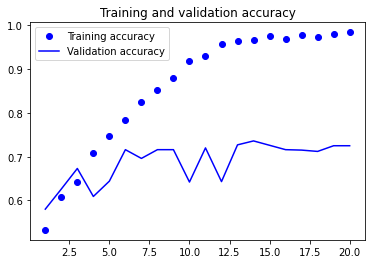

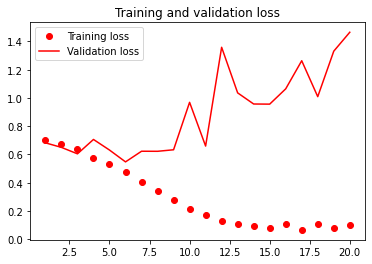

In [12]:
# Plot the loss and accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see, with AlexNet architecture, we are able to reach a relatively good result with high validation accuracy. I believe if we add in the process of data augmentation, the accuracy of the model could be greatly increased. However, we will not be doing it here in this notebook as the goal of this notebook is to show the AlexNet architecture and how it is already ourperforming our baseline model.

Hence, let's save our model.

In [13]:
# Save the model
model.save("cats_dogs_classifier.h5")

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=20, class_mode='binary')
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 20,
                              validation_data = validation_generator,
                              validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 566s 6s/step - loss: 0.6660 - accuracy: 0.6560 - val_loss: 0.6040 - val_accuracy: 0.6950
Epoch 2/20
100/100 [==============================] - 566s 6s/step - loss: 0.6201 - accuracy: 0.6805 - val_loss: 0.5702 - val_accuracy: 0.7110
Epoch 3/20
100/100 [==============================] - 560s 6s/step - loss: 0.6193 - accuracy: 0.6710 - val_loss: 0.5514 - val_accuracy: 0.7010
Epoch 4/20
100/100 [==============================] - 555s 6s/step - loss: 0.6051 - accuracy: 0.6860 - val_loss: 0.5421 - val_accuracy: 0.7280
Epoch 5/20
100/100 [==============================] - 558s 6s/step - loss: 0.5876 - accuracy: 0.6940 - val_loss: 0.5798 - val_accuracy: 0.6580
Epoch 6/20
100/100 [==============================] - 558s 6s/step - loss: 0.5954 - accuracy: 0.6835 - val_loss: 0.5859 - val_accuracy: 0.6820
Epoch 7/20
100/100 [==============================] - 551s 6s/step - loss: 0.5795 - accuracy: 0.6985 - val_loss: 0.5479 - val_accuracy: 0.7520

In [17]:
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print("Training accuracy: ", acc)
print("Training loss: ", loss)

print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

Training accuracy:  0.7670000195503235
Training loss:  0.5157614350318909
Validation accuracy:  0.7509999871253967
Validation loss:  0.5056633353233337


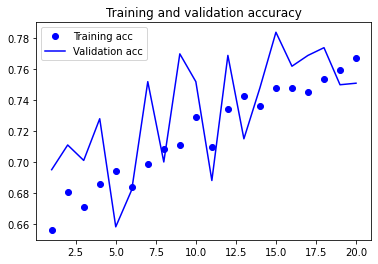

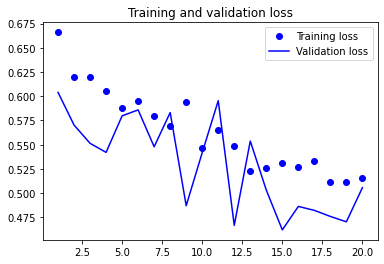

In [18]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see, after data augmentation, the validation accuracy achieved a slight increase, all the while maintaining the consistency with the training accuracy, which suggests that our model is not overfitting. Although this is not the original AlexNet architecture but a modified one, it is still worth giving this model a try on classifying cats and dogs. We will not try it in this notebook, but will use a top-of-the-line network to view the results in a future notebook.

We will try out another architecture in the next notebook, namely the VGG-16 architecture. It takes up about 500MB of storage space as the network is very much deeper than AlexNet, hence storage space will be an issue to note in the next notebook. Otherwise, we will start adopting *transfer learning* to avoid building the entire model from scratch, but achieve the same result as we would expect. 